In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from skimage.metrics import structural_similarity as ssim
from skimage import io
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})


# Evaluations

## NCU Statistics

In [3]:
# this code chunk reads the data from the 5 ncu csvs into a dataframe for each experiment 
# the id column distinguishes between the 5 repetitions of the experiment
# path to experiments folder
experiments_path = './experiments_new'

experiment_dataframes = {}

for experiment in os.listdir(experiments_path):
    experiment_folder = os.path.join(experiments_path, experiment)
    
    if os.path.isdir(experiment_folder):
        csv_files = [f for f in os.listdir(experiment_folder) if (f.endswith('.csv') and not f.endswith('gpu_memory.csv'))]
        
        dfs = []
        for csv_file in csv_files:
            file_path = os.path.join(experiment_folder, csv_file)
            df = pd.read_csv(file_path)
            dfs.append(df)
        
        experiment_dataframes[experiment] = pd.concat(dfs, ignore_index=True)

# display head of each experiment
for experiment, df in experiment_dataframes.items():
    print(f"\n{experiment} DataFrame:")
    display(df)


RayTracing_BASELINE_6000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,699,RayTracing_BASELINE_6000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.47,NaN,NaN,NaN,NaN,NaN
1,0,699,RayTracing_BASELINE_6000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,699,RayTracing_BASELINE_6000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3733,NaN,NaN,NaN,NaN,NaN
3,0,699,RayTracing_BASELINE_6000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,699,RayTracing_BASELINE_6000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,2591,RayTracing_BASELINE_6000_02,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,2591,RayTracing_BASELINE_6000_02,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,2591,RayTracing_BASELINE_6000_02,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,2591,RayTracing_BASELINE_6000_02,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_2000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,32709,RayTracing_OCTREE_2000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.52,NaN,NaN,NaN,NaN,NaN
1,0,32709,RayTracing_OCTREE_2000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,32709,RayTracing_OCTREE_2000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3706,NaN,NaN,NaN,NaN,NaN
3,0,32709,RayTracing_OCTREE_2000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,32709,RayTracing_OCTREE_2000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,502,RayTracing_OCTREE_2000_02,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,502,RayTracing_OCTREE_2000_02,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,502,RayTracing_OCTREE_2000_02,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,502,RayTracing_OCTREE_2000_02,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_4000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,11688,RayTracing_BASELINE_4000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.40,NaN,NaN,NaN,NaN,NaN
1,0,11688,RayTracing_BASELINE_4000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.13,NaN,NaN,NaN,NaN,NaN
2,0,11688,RayTracing_BASELINE_4000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3753,NaN,NaN,NaN,NaN,NaN
3,0,11688,RayTracing_BASELINE_4000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,11688,RayTracing_BASELINE_4000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,13086,RayTracing_BASELINE_4000_02,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,13086,RayTracing_BASELINE_4000_02,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,13086,RayTracing_BASELINE_4000_02,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,13086,RayTracing_BASELINE_4000_02,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_9000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,1915,RayTracing_OCTREE_9000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.47,NaN,NaN,NaN,NaN,NaN
1,0,1915,RayTracing_OCTREE_9000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.13,NaN,NaN,NaN,NaN,NaN
2,0,1915,RayTracing_OCTREE_9000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3761,NaN,NaN,NaN,NaN,NaN
3,0,1915,RayTracing_OCTREE_9000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,1915,RayTracing_OCTREE_9000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,3755,RayTracing_OCTREE_9000_01,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,3755,RayTracing_OCTREE_9000_01,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,3755,RayTracing_OCTREE_9000_01,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,3755,RayTracing_OCTREE_9000_01,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_488_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,18331,RayTracing_OCTREE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.43,NaN,NaN,NaN,NaN,NaN
1,0,18331,RayTracing_OCTREE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,18331,RayTracing_OCTREE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3806,NaN,NaN,NaN,NaN,NaN
3,0,18331,RayTracing_OCTREE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.41,NaN,NaN,NaN,NaN,NaN
4,0,18331,RayTracing_OCTREE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,18139,RayTracing_OCTREE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,18139,RayTracing_OCTREE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,18139,RayTracing_OCTREE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,18139,RayTracing_OCTREE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_6000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,3626,RayTracing_OCTREE_6000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.52,NaN,NaN,NaN,NaN,NaN
1,0,3626,RayTracing_OCTREE_6000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.15,NaN,NaN,NaN,NaN,NaN
2,0,3626,RayTracing_OCTREE_6000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3722,NaN,NaN,NaN,NaN,NaN
3,0,3626,RayTracing_OCTREE_6000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,3626,RayTracing_OCTREE_6000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,4,4830,RayTracing_OCTREE_6000_02,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1194,4,4830,RayTracing_OCTREE_6000_02,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1195,4,4830,RayTracing_OCTREE_6000_02,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1196,4,4830,RayTracing_OCTREE_6000_02,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_2000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,31196,RayTracing_BASELINE_2000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.44,NaN,NaN,NaN,NaN,NaN
1,0,31196,RayTracing_BASELINE_2000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,31196,RayTracing_BASELINE_2000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3674,NaN,NaN,NaN,NaN,NaN
3,0,31196,RayTracing_BASELINE_2000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,31196,RayTracing_BASELINE_2000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,31526,RayTracing_BASELINE_2000_02,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,31526,RayTracing_BASELINE_2000_02,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,31526,RayTracing_BASELINE_2000_02,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,31526,RayTracing_BASELINE_2000_02,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_9000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,29194,RayTracing_BASELINE_9000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.40,NaN,NaN,NaN,NaN,NaN
1,0,29194,RayTracing_BASELINE_9000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,29194,RayTracing_BASELINE_9000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3740,NaN,NaN,NaN,NaN,NaN
3,0,29194,RayTracing_BASELINE_9000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,4.40,NaN,NaN,NaN,NaN,NaN
4,0,29194,RayTracing_BASELINE_9000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,4.40,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,876,RayTracing_BASELINE_9000_01,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,876,RayTracing_BASELINE_9000_01,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,876,RayTracing_BASELINE_9000_01,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,876,RayTracing_BASELINE_9000_01,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_4000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,13857,RayTracing_OCTREE_4000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.54,NaN,NaN,NaN,NaN,NaN
1,0,13857,RayTracing_OCTREE_4000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.16,NaN,NaN,NaN,NaN,NaN
2,0,13857,RayTracing_OCTREE_4000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3605,NaN,NaN,NaN,NaN,NaN
3,0,13857,RayTracing_OCTREE_4000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.44,NaN,NaN,NaN,NaN,NaN
4,0,13857,RayTracing_OCTREE_4000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,4,14763,RayTracing_OCTREE_4000_02,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1196,4,14763,RayTracing_OCTREE_4000_02,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1197,4,14763,RayTracing_OCTREE_4000_02,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1198,4,14763,RayTracing_OCTREE_4000_02,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_8000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,23136,RayTracing_OCTREE_8000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.44,NaN,NaN,NaN,NaN,NaN
1,0,23136,RayTracing_OCTREE_8000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.16,NaN,NaN,NaN,NaN,NaN
2,0,23136,RayTracing_OCTREE_8000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3734,NaN,NaN,NaN,NaN,NaN
3,0,23136,RayTracing_OCTREE_8000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,23136,RayTracing_OCTREE_8000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,21534,RayTracing_OCTREE_8000_01,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,21534,RayTracing_OCTREE_8000_01,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,21534,RayTracing_OCTREE_8000_01,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,21534,RayTracing_OCTREE_8000_01,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_5000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,25083,RayTracing_BASELINE_5000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.64,NaN,NaN,NaN,NaN,NaN
1,0,25083,RayTracing_BASELINE_5000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.17,NaN,NaN,NaN,NaN,NaN
2,0,25083,RayTracing_BASELINE_5000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3676,NaN,NaN,NaN,NaN,NaN
3,0,25083,RayTracing_BASELINE_5000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,25083,RayTracing_BASELINE_5000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,23442,RayTracing_BASELINE_5000_02,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,23442,RayTracing_BASELINE_5000_02,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,23442,RayTracing_BASELINE_5000_02,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,23442,RayTracing_BASELINE_5000_02,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_3000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,7091,RayTracing_OCTREE_3000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.49,NaN,NaN,NaN,NaN,NaN
1,0,7091,RayTracing_OCTREE_3000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.15,NaN,NaN,NaN,NaN,NaN
2,0,7091,RayTracing_OCTREE_3000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3642,NaN,NaN,NaN,NaN,NaN
3,0,7091,RayTracing_OCTREE_3000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,2.42,NaN,NaN,NaN,NaN,NaN
4,0,7091,RayTracing_OCTREE_3000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,6795,RayTracing_OCTREE_3000_02,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,6795,RayTracing_OCTREE_3000_02,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,6795,RayTracing_OCTREE_3000_02,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,6795,RayTracing_OCTREE_3000_02,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_1000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,27733,RayTracing_OCTREE_1000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.44,NaN,NaN,NaN,NaN,NaN
1,0,27733,RayTracing_OCTREE_1000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.15,NaN,NaN,NaN,NaN,NaN
2,0,27733,RayTracing_OCTREE_1000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3722,NaN,NaN,NaN,NaN,NaN
3,0,27733,RayTracing_OCTREE_1000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,27733,RayTracing_OCTREE_1000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,27517,RayTracing_OCTREE_1000_02,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,27517,RayTracing_OCTREE_1000_02,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,27517,RayTracing_OCTREE_1000_02,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,27517,RayTracing_OCTREE_1000_02,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_7000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,14029,RayTracing_BASELINE_7000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.44,NaN,NaN,NaN,NaN,NaN
1,0,14029,RayTracing_BASELINE_7000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.15,NaN,NaN,NaN,NaN,NaN
2,0,14029,RayTracing_BASELINE_7000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3727,NaN,NaN,NaN,NaN,NaN
3,0,14029,RayTracing_BASELINE_7000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,14029,RayTracing_BASELINE_7000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,11839,RayTracing_BASELINE_7000_02,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,11839,RayTracing_BASELINE_7000_02,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,11839,RayTracing_BASELINE_7000_02,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,11839,RayTracing_BASELINE_7000_02,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_5000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,27104,RayTracing_OCTREE_5000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.52,NaN,NaN,NaN,NaN,NaN
1,0,27104,RayTracing_OCTREE_5000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.16,NaN,NaN,NaN,NaN,NaN
2,0,27104,RayTracing_OCTREE_5000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3734,NaN,NaN,NaN,NaN,NaN
3,0,27104,RayTracing_OCTREE_5000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,27104,RayTracing_OCTREE_5000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,4,26004,RayTracing_OCTREE_5000_02,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1196,4,26004,RayTracing_OCTREE_5000_02,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1197,4,26004,RayTracing_OCTREE_5000_02,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1198,4,26004,RayTracing_OCTREE_5000_02,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_8000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,20641,RayTracing_BASELINE_8000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.74,NaN,NaN,NaN,NaN,NaN
1,0,20641,RayTracing_BASELINE_8000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.18,NaN,NaN,NaN,NaN,NaN
2,0,20641,RayTracing_BASELINE_8000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,10625,NaN,NaN,NaN,NaN,NaN
3,0,20641,RayTracing_BASELINE_8000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.36,NaN,NaN,NaN,NaN,NaN
4,0,20641,RayTracing_BASELINE_8000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,17069,RayTracing_BASELINE_8000_01,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,17069,RayTracing_BASELINE_8000_01,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,17069,RayTracing_BASELINE_8000_01,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,17069,RayTracing_BASELINE_8000_01,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_3000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,5312,RayTracing_BASELINE_3000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.54,NaN,NaN,NaN,NaN,NaN
1,0,5312,RayTracing_BASELINE_3000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.15,NaN,NaN,NaN,NaN,NaN
2,0,5312,RayTracing_BASELINE_3000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3577,NaN,NaN,NaN,NaN,NaN
3,0,5312,RayTracing_BASELINE_3000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.44,NaN,NaN,NaN,NaN,NaN
4,0,5312,RayTracing_BASELINE_3000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,4870,RayTracing_BASELINE_3000_02,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,4870,RayTracing_BASELINE_3000_02,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,4870,RayTracing_BASELINE_3000_02,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,4870,RayTracing_BASELINE_3000_02,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_488_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,15412,RayTracing_BASELINE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.49,NaN,NaN,NaN,NaN,NaN
1,0,15412,RayTracing_BASELINE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.15,NaN,NaN,NaN,NaN,NaN
2,0,15412,RayTracing_BASELINE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3651,NaN,NaN,NaN,NaN,NaN
3,0,15412,RayTracing_BASELINE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,15412,RayTracing_BASELINE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,15584,RayTracing_BASELINE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,15584,RayTracing_BASELINE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,15584,RayTracing_BASELINE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,15584,RayTracing_BASELINE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_1000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,26674,RayTracing_BASELINE_1000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.33,NaN,NaN,NaN,NaN,NaN
1,0,26674,RayTracing_BASELINE_1000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,26674,RayTracing_BASELINE_1000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3736,NaN,NaN,NaN,NaN,NaN
3,0,26674,RayTracing_BASELINE_1000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,26674,RayTracing_BASELINE_1000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,26470,RayTracing_BASELINE_1000_02,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,26470,RayTracing_BASELINE_1000_02,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,26470,RayTracing_BASELINE_1000_02,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,26470,RayTracing_BASELINE_1000_02,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_7000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,16608,RayTracing_OCTREE_7000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.59,NaN,NaN,NaN,NaN,NaN
1,0,16608,RayTracing_OCTREE_7000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,16608,RayTracing_OCTREE_7000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3711,NaN,NaN,NaN,NaN,NaN
3,0,16608,RayTracing_OCTREE_7000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,16608,RayTracing_OCTREE_7000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,4,15224,RayTracing_OCTREE_7000_02,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1196,4,15224,RayTracing_OCTREE_7000_02,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1197,4,15224,RayTracing_OCTREE_7000_02,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1198,4,15224,RayTracing_OCTREE_7000_02,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_6000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,28837,RayTracing_BASELINE_6000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.47,NaN,NaN,NaN,NaN,NaN
1,0,28837,RayTracing_BASELINE_6000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,28837,RayTracing_BASELINE_6000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3778,NaN,NaN,NaN,NaN,NaN
3,0,28837,RayTracing_BASELINE_6000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,28837,RayTracing_BASELINE_6000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,29519,RayTracing_BASELINE_6000_01,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,29519,RayTracing_BASELINE_6000_01,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,29519,RayTracing_BASELINE_6000_01,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,29519,RayTracing_BASELINE_6000_01,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_2000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,29699,RayTracing_OCTREE_2000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.52,NaN,NaN,NaN,NaN,NaN
1,0,29699,RayTracing_OCTREE_2000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,29699,RayTracing_OCTREE_2000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3702,NaN,NaN,NaN,NaN,NaN
3,0,29699,RayTracing_OCTREE_2000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,29699,RayTracing_OCTREE_2000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,30323,RayTracing_OCTREE_2000_01,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,30323,RayTracing_OCTREE_2000_01,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,30323,RayTracing_OCTREE_2000_01,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,30323,RayTracing_OCTREE_2000_01,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_9000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,7999,RayTracing_OCTREE_9000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.47,NaN,NaN,NaN,NaN,NaN
1,0,7999,RayTracing_OCTREE_9000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.16,NaN,NaN,NaN,NaN,NaN
2,0,7999,RayTracing_OCTREE_9000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3820,NaN,NaN,NaN,NaN,NaN
3,0,7999,RayTracing_OCTREE_9000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.41,NaN,NaN,NaN,NaN,NaN
4,0,7999,RayTracing_OCTREE_9000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,9615,RayTracing_OCTREE_9000_02,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,9615,RayTracing_OCTREE_9000_02,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,9615,RayTracing_OCTREE_9000_02,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,9615,RayTracing_OCTREE_9000_02,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_4000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,8568,RayTracing_BASELINE_4000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.68,NaN,NaN,NaN,NaN,NaN
1,0,8568,RayTracing_BASELINE_4000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.16,NaN,NaN,NaN,NaN,NaN
2,0,8568,RayTracing_BASELINE_4000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,7547,NaN,NaN,NaN,NaN,NaN
3,0,8568,RayTracing_BASELINE_4000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.37,NaN,NaN,NaN,NaN,NaN
4,0,8568,RayTracing_BASELINE_4000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.12,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,9010,RayTracing_BASELINE_4000_01,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,9010,RayTracing_BASELINE_4000_01,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,9010,RayTracing_BASELINE_4000_01,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,9010,RayTracing_BASELINE_4000_01,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_6000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,31548,RayTracing_OCTREE_6000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.72,NaN,NaN,NaN,NaN,NaN
1,0,31548,RayTracing_OCTREE_6000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.19,NaN,NaN,NaN,NaN,NaN
2,0,31548,RayTracing_OCTREE_6000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,15375,NaN,NaN,NaN,NaN,NaN
3,0,31548,RayTracing_OCTREE_6000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.36,NaN,NaN,NaN,NaN,NaN
4,0,31548,RayTracing_OCTREE_6000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,31876,RayTracing_OCTREE_6000_01,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,31876,RayTracing_OCTREE_6000_01,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,31876,RayTracing_OCTREE_6000_01,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,31876,RayTracing_OCTREE_6000_01,127.0.0.1,"free_world(sphere (*)[6000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_488_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,16683,RayTracing_OCTREE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.40,NaN,NaN,NaN,NaN,NaN
1,0,16683,RayTracing_OCTREE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.13,NaN,NaN,NaN,NaN,NaN
2,0,16683,RayTracing_OCTREE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3753,NaN,NaN,NaN,NaN,NaN
3,0,16683,RayTracing_OCTREE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.46,NaN,NaN,NaN,NaN,NaN
4,0,16683,RayTracing_OCTREE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,4,16119,RayTracing_OCTREE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1196,4,16119,RayTracing_OCTREE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1197,4,16119,RayTracing_OCTREE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1198,4,16119,RayTracing_OCTREE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_2000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,28432,RayTracing_BASELINE_2000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.67,NaN,NaN,NaN,NaN,NaN
1,0,28432,RayTracing_BASELINE_2000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.16,NaN,NaN,NaN,NaN,NaN
2,0,28432,RayTracing_BASELINE_2000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3735,NaN,NaN,NaN,NaN,NaN
3,0,28432,RayTracing_BASELINE_2000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,28432,RayTracing_BASELINE_2000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,29224,RayTracing_BASELINE_2000_01,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,29224,RayTracing_BASELINE_2000_01,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,29224,RayTracing_BASELINE_2000_01,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,29224,RayTracing_BASELINE_2000_01,127.0.0.1,"free_world(sphere (*)[2000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_4000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,10425,RayTracing_OCTREE_4000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.44,NaN,NaN,NaN,NaN,NaN
1,0,10425,RayTracing_OCTREE_4000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.13,NaN,NaN,NaN,NaN,NaN
2,0,10425,RayTracing_OCTREE_4000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3686,NaN,NaN,NaN,NaN,NaN
3,0,10425,RayTracing_OCTREE_4000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,10425,RayTracing_OCTREE_4000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,10691,RayTracing_OCTREE_4000_01,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,10691,RayTracing_OCTREE_4000_01,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,10691,RayTracing_OCTREE_4000_01,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,10691,RayTracing_OCTREE_4000_01,127.0.0.1,"free_world(sphere (*)[4000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_9000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,4216,RayTracing_BASELINE_9000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.59,NaN,NaN,NaN,NaN,NaN
1,0,4216,RayTracing_BASELINE_9000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.17,NaN,NaN,NaN,NaN,NaN
2,0,4216,RayTracing_BASELINE_9000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3756,NaN,NaN,NaN,NaN,NaN
3,0,4216,RayTracing_BASELINE_9000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,4216,RayTracing_BASELINE_9000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,6486,RayTracing_BASELINE_9000_02,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,6486,RayTracing_BASELINE_9000_02,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,6486,RayTracing_BASELINE_9000_02,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,6486,RayTracing_BASELINE_9000_02,127.0.0.1,"free_world(sphere (*)[9000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_5000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,20340,RayTracing_BASELINE_5000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.47,NaN,NaN,NaN,NaN,NaN
1,0,20340,RayTracing_BASELINE_5000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,20340,RayTracing_BASELINE_5000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3762,NaN,NaN,NaN,NaN,NaN
3,0,20340,RayTracing_BASELINE_5000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,20340,RayTracing_BASELINE_5000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,19798,RayTracing_BASELINE_5000_01,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,19798,RayTracing_BASELINE_5000_01,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,19798,RayTracing_BASELINE_5000_01,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,19798,RayTracing_BASELINE_5000_01,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_8000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,28251,RayTracing_OCTREE_8000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.52,NaN,NaN,NaN,NaN,NaN
1,0,28251,RayTracing_OCTREE_8000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.16,NaN,NaN,NaN,NaN,NaN
2,0,28251,RayTracing_OCTREE_8000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3735,NaN,NaN,NaN,NaN,NaN
3,0,28251,RayTracing_OCTREE_8000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,28251,RayTracing_OCTREE_8000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,26837,RayTracing_OCTREE_8000_02,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,26837,RayTracing_OCTREE_8000_02,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,26837,RayTracing_OCTREE_8000_02,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,26837,RayTracing_OCTREE_8000_02,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_3000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,3753,RayTracing_OCTREE_3000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.44,NaN,NaN,NaN,NaN,NaN
1,0,3753,RayTracing_OCTREE_3000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.13,NaN,NaN,NaN,NaN,NaN
2,0,3753,RayTracing_OCTREE_3000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3678,NaN,NaN,NaN,NaN,NaN
3,0,3753,RayTracing_OCTREE_3000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,3753,RayTracing_OCTREE_3000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,3051,RayTracing_OCTREE_3000_01,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,3051,RayTracing_OCTREE_3000_01,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,3051,RayTracing_OCTREE_3000_01,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,3051,RayTracing_OCTREE_3000_01,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_1000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,25865,RayTracing_OCTREE_1000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.37,NaN,NaN,NaN,NaN,NaN
1,0,25865,RayTracing_OCTREE_1000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,25865,RayTracing_OCTREE_1000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3661,NaN,NaN,NaN,NaN,NaN
3,0,25865,RayTracing_OCTREE_1000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,25865,RayTracing_OCTREE_1000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,4,25283,RayTracing_OCTREE_1000_01,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1196,4,25283,RayTracing_OCTREE_1000_01,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1197,4,25283,RayTracing_OCTREE_1000_01,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1198,4,25283,RayTracing_OCTREE_1000_01,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_7000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,7661,RayTracing_BASELINE_7000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.64,NaN,NaN,NaN,NaN,NaN
1,0,7661,RayTracing_BASELINE_7000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.17,NaN,NaN,NaN,NaN,NaN
2,0,7661,RayTracing_BASELINE_7000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3688,NaN,NaN,NaN,NaN,NaN
3,0,7661,RayTracing_BASELINE_7000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,7661,RayTracing_BASELINE_7000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,6851,RayTracing_BASELINE_7000_01,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,6851,RayTracing_BASELINE_7000_01,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,6851,RayTracing_BASELINE_7000_01,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,6851,RayTracing_BASELINE_7000_01,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_8000_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,25520,RayTracing_BASELINE_8000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.25,NaN,NaN,NaN,NaN,NaN
1,0,25520,RayTracing_BASELINE_8000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,25520,RayTracing_BASELINE_8000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3733,NaN,NaN,NaN,NaN,NaN
3,0,25520,RayTracing_BASELINE_8000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,25520,RayTracing_BASELINE_8000_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,23539,RayTracing_BASELINE_8000_02,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,23539,RayTracing_BASELINE_8000_02,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,23539,RayTracing_BASELINE_8000_02,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,23539,RayTracing_BASELINE_8000_02,127.0.0.1,"free_world(sphere (*)[8000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_5000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,22305,RayTracing_OCTREE_5000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.44,NaN,NaN,NaN,NaN,NaN
1,0,22305,RayTracing_OCTREE_5000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,22305,RayTracing_OCTREE_5000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3664,NaN,NaN,NaN,NaN,NaN
3,0,22305,RayTracing_OCTREE_5000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,1.13,NaN,NaN,NaN,NaN,NaN
4,0,22305,RayTracing_OCTREE_5000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,4,22011,RayTracing_OCTREE_5000_01,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1194,4,22011,RayTracing_OCTREE_5000_01,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1195,4,22011,RayTracing_OCTREE_5000_01,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1196,4,22011,RayTracing_OCTREE_5000_01,127.0.0.1,"free_world(sphere (*)[5000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_3000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,2456,RayTracing_BASELINE_3000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.64,NaN,NaN,NaN,NaN,NaN
1,0,2456,RayTracing_BASELINE_3000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.18,NaN,NaN,NaN,NaN,NaN
2,0,2456,RayTracing_BASELINE_3000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3696,NaN,NaN,NaN,NaN,NaN
3,0,2456,RayTracing_BASELINE_3000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,2456,RayTracing_BASELINE_3000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,1382,RayTracing_BASELINE_3000_01,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,1382,RayTracing_BASELINE_3000_01,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,1382,RayTracing_BASELINE_3000_01,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,1382,RayTracing_BASELINE_3000_01,127.0.0.1,"free_world(sphere (*)[3000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_1000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,24896,RayTracing_BASELINE_1000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.44,NaN,NaN,NaN,NaN,NaN
1,0,24896,RayTracing_BASELINE_1000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.13,NaN,NaN,NaN,NaN,NaN
2,0,24896,RayTracing_BASELINE_1000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3693,NaN,NaN,NaN,NaN,NaN
3,0,24896,RayTracing_BASELINE_1000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,24896,RayTracing_BASELINE_1000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,24326,RayTracing_BASELINE_1000_01,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,24326,RayTracing_BASELINE_1000_01,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,24326,RayTracing_BASELINE_1000_01,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,24326,RayTracing_BASELINE_1000_01,127.0.0.1,"free_world(sphere (*)[1000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_OCTREE_7000_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,10378,RayTracing_OCTREE_7000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.47,NaN,NaN,NaN,NaN,NaN
1,0,10378,RayTracing_OCTREE_7000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,10378,RayTracing_OCTREE_7000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3768,NaN,NaN,NaN,NaN,NaN
3,0,10378,RayTracing_OCTREE_7000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,10378,RayTracing_OCTREE_7000_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,10012,RayTracing_OCTREE_7000_01,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,10012,RayTracing_OCTREE_7000_01,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,10012,RayTracing_OCTREE_7000_01,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,10012,RayTracing_OCTREE_7000_01,127.0.0.1,"free_world(sphere (*)[7000], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_BASELINE_488_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,17050,RayTracing_BASELINE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.47,NaN,NaN,NaN,NaN,NaN
1,0,17050,RayTracing_BASELINE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,17050,RayTracing_BASELINE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3742,NaN,NaN,NaN,NaN,NaN
3,0,17050,RayTracing_BASELINE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,17050,RayTracing_BASELINE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,17578,RayTracing_BASELINE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,17578,RayTracing_BASELINE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,17578,RayTracing_BASELINE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,17578,RayTracing_BASELINE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83


In [4]:
# here the repetitions of each experiment will be combined
# the values of metrics_to_average will be averaged and stored in a new data frame
# alongside with other important information like number of spheres, sphere radius, baseline T/F, kernel_name
# metrics to calculate averages for
metrics_to_average = ["Memory Throughput", "Duration", "Theoretical Occupancy", "Achieved Occupancy"]

result_data = []

for experiment, df in experiment_dataframes.items():
    # extract NUM_SPHERES and SPHERE_RADIUS from experiment name
    parts = experiment.split('_')
    numbers = [p for p in parts if p.isdigit()]
    
    if len(numbers) == 2:
        num_spheres = int(numbers[0])
        sphere_radius = int(numbers[1])/10
    else:
        num_spheres = 488
        sphere_radius = 0.2
    
    is_baseline = 'BASELINE' in experiment
    
    for kernel_name in df['Kernel Name'].unique():
        filtered_df = df[df['Kernel Name'] == kernel_name]
        kernel_name = kernel_name.split('(')[0] 
        
        for metric in metrics_to_average:
            metric_values = filtered_df[filtered_df['Metric Name'] == metric][['Metric Value', 'Metric Unit']]
            metric_values['Metric Value'] = pd.to_numeric(metric_values['Metric Value'], errors='coerce').dropna()

            # convert all durations to milliseconds
            metric_values.loc[metric_values['Metric Unit'] == 's', 'Metric Value'] *= 1000
            metric_values.loc[metric_values['Metric Unit'] == 'us', 'Metric Value'] /= 1000
            
            if not metric_values['Metric Value'].empty:
                avg_value = metric_values['Metric Value'].mean()
                result_data.append({
                    'experiment_name': experiment,
                    'kernel_name': kernel_name,
                    'metric_name': metric,
                    'avg': avg_value,
                    'NUM_SPHERES': num_spheres,
                    'SPHERE_RADIUS': sphere_radius,
                    'BASELINE': is_baseline
                })

result_df = pd.DataFrame(result_data)

# display all duration values
print(result_df[result_df['metric_name'] == 'Duration'])

                 experiment_name   kernel_name metric_name          avg  \
1    RayTracing_BASELINE_6000_02     rand_init    Duration     0.001730   
5    RayTracing_BASELINE_6000_02  create_world    Duration   358.988000   
9    RayTracing_BASELINE_6000_02   render_init    Duration     0.109748   
13   RayTracing_BASELINE_6000_02        render    Duration  3956.000000   
17   RayTracing_BASELINE_6000_02    free_world    Duration   344.690000   
..                           ...           ...         ...          ...   
781   RayTracing_BASELINE_488_02     rand_init    Duration     0.001748   
785   RayTracing_BASELINE_488_02  create_world    Duration     4.920000   
789   RayTracing_BASELINE_488_02   render_init    Duration     0.109786   
793   RayTracing_BASELINE_488_02        render    Duration   121.822000   
797   RayTracing_BASELINE_488_02    free_world    Duration     4.570000   

     NUM_SPHERES  SPHERE_RADIUS  BASELINE  
1           6000            0.2      True  
5          

## Reason for focusing on render kernel

It dominates the runtime.

<Figure size 100x10000 with 0 Axes>

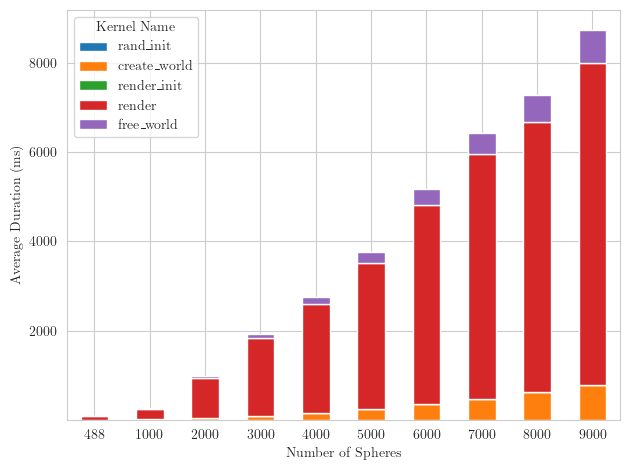

In [5]:
baseline_df = result_df[(result_df['BASELINE'] == True) & 
                        (result_df['metric_name'] == 'Duration') & 
                        (result_df['SPHERE_RADIUS'] == 0.1)]

# define kernel stacking order
kernel_order = ['rand_init', 'create_world', 'render_init', 'render', 'free_world']

pivot_df = baseline_df.pivot(index='NUM_SPHERES', columns='kernel_name', values='avg')

pivot_df = pivot_df[kernel_order]

plt.figure(figsize=(1, 100))
pivot_df.plot(kind='bar', stacked=True)

#plt.title('Stacked Bar Plot of Duration by Kernel for Baseline Experiments (Sphere Radius 0.1)')
plt.ylabel('Average Duration (ms)')
plt.xlabel('Number of Spheres')
plt.xticks(rotation=0)
plt.legend(title='Kernel Name')
plt.tight_layout()
plt.savefig("reason_for_focus_on_kernel.pdf")
plt.show()

## Compare original baselines with half precision

### Runtime Comparsion

In [6]:
filtered_df = result_df[(result_df['experiment_name'].isin(['RayTracingBaseline', 'RayTracingFP16'])) &
                        (result_df['kernel_name'] == 'render') &
                        (result_df['metric_name'] == 'Duration')]

bar_data = filtered_df.groupby('experiment_name')['avg'].mean()

speedup = bar_data['RayTracingBaseline'] / bar_data['RayTracingFP16']
print(f"Speedup trough Half Precision: {speedup:.3f}x")

plt.figure(figsize=(4, 6))
ax = bar_data.plot(kind='bar', color=['blue', 'orange'], width=0.6)

for i, value in enumerate(bar_data):
    ax.text(i, value + 5, f'{value:.2f} ms', ha='center')

plt.title('Comparison of Duration for Baseline (Single Precision) vs FP16 (Half Precision)')
plt.ylabel('Average Duration (ms)')
plt.xlabel("Precision")
plt.xticks(ticks=[0, 1], labels=['Single', 'Half'], rotation=0)
plt.tight_layout()
plt.ylim(0,360)
plt.show()

KeyError: 'RayTracingBaseline'

### Image Quaality Comparison

In [100]:
def load_ppm_image(path):
    image = io.imread(path)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


def calculate_metrics(img1, img2):
    ssim_value, _ = ssim(img1, img2, full=True)
    psnr_value = cv2.PSNR(img1, img2)
    return ssim_value, psnr_value


def compare_experiment_images(experiments_folder):
    experiment_images = {}

    for subfolder in os.listdir(experiments_folder):
        subfolder_path = os.path.join(experiments_folder, subfolder)
        if os.path.isdir(subfolder_path):
            images = sorted([f for f in os.listdir(subfolder_path) if f.endswith('_1.ppm')])
            if images:
                image_path = os.path.join(subfolder_path, images[0])
                experiment_images[subfolder] = load_ppm_image(image_path)

    results = []
    experiment_names = list(experiment_images.keys())

    for i in range(len(experiment_names)):
        for j in range(i + 1, len(experiment_names)):
            exp1, exp2 = experiment_names[i], experiment_names[j]
            img1, img2 = experiment_images[exp1], experiment_images[exp2]
            ssim_value, psnr_value = calculate_metrics(img1, img2)
            results.append({
                'Experiment 1': exp1,
                'Experiment 2': exp2,
                'SSIM': ssim_value,
                'PSNR': psnr_value
            })

    results_df = pd.DataFrame(results)
    results_df.to_csv('comparison_results.csv', index=False)
    print("Comparison complete. Results saved to 'comparison_results.csv'.")
    return results_df

image_comp_result = compare_experiment_images("experiments")
image_comp_result

Comparison complete. Results saved to 'comparison_results.csv'.


,Experiment 1,Experiment 2,SSIM,PSNR
0,RayTracing_MAX_OCTREE_488_02,RayTracing_MAX_OCTREE_7748_01,0.488889,14.827480
1,RayTracing_MAX_OCTREE_488_02,RayTracing_MAX_BASELINE_1940_02,0.511476,14.130421
2,RayTracing_MAX_OCTREE_488_02,RayTracing_MAX_BASELINE_4360_02,0.522213,15.201173
3,RayTracing_MAX_OCTREE_488_02,RayTracing_MAX_BASELINE_3029_02,0.518084,14.443989
4,RayTracing_MAX_OCTREE_488_02,RayTracing_MAX_BASELINE_1093_01,0.564228,16.373901
...,...,...,...,...
320,RayTracing_MAX_OCTREE_3029_02,RayTracing_MAX_BASELINE_7748_01,0.477803,15.175794
321,RayTracing_MAX_OCTREE_3029_02,RayTracing_MAX_BASELINE_488_01,0.546183,14.059760
322,RayTracing_MAX_OCTREE_1940_02,RayTracing_MAX_BASELINE_7748_01,0.477276,15.493928
323,RayTracing_MAX_OCTREE_1940_02,RayTracing_MAX_BASELINE_488_01,0.536464,13.595790


In [101]:
image_comp_result[(image_comp_result['Experiment 2'] == "RayTracingBaseline") & (image_comp_result['Experiment 1'] == "RayTracingFP16")]

,Experiment 1,Experiment 2,SSIM,PSNR
136,RayTracingFP16,RayTracingBaseline,0.431671,12.445738


SSIM Interpretation:
The SSIM value of 0.4317 indicates moderate dissimilarity between EXP_COLAB_FP16 and EXP_COLAB_BASELINE. SSIM ranges from -1 to 1, where 1 represents identical images. A value below 0.5 suggests noticeable structural differences, likely caused by variations in rendering precision or artifacts introduced by using FP16 computations.

PSNR Interpretation:
The PSNR of 12.44 dB reflects significant distortion or loss of quality. Higher PSNR values (above 30 dB) indicate better similarity, while values below 20 dB suggest visible degradation. The lower PSNR here highlights the impact of reduced precision, potentially resulting in compression artifacts or increased noise in the FP16 experiment.

TODO: remove

## Improvement through OCTREE

### Radius=0.1

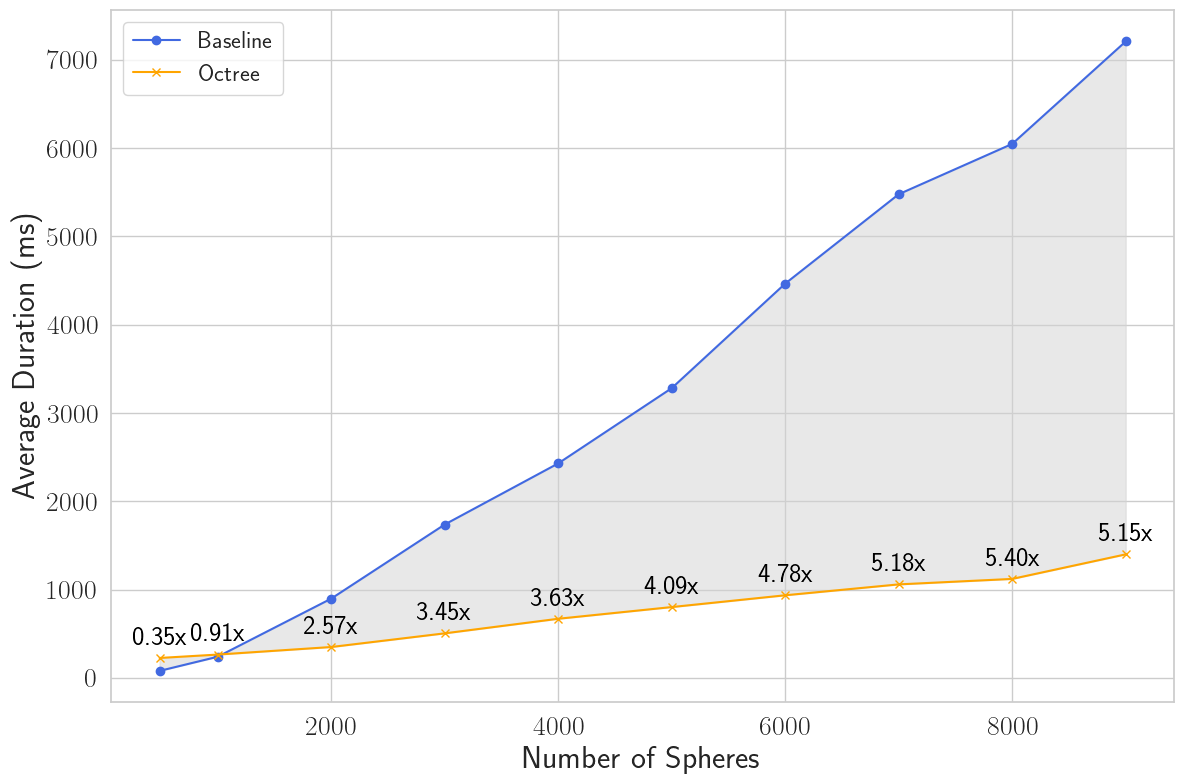

   NUM_SPHERES   Speedup
0          488  0.349316
1         1000  0.906366
2         2000  2.570424
3         3000  3.446742
4         4000  3.630926
5         5000  4.093737
6         6000  4.776027
7         7000  5.175803
8         8000  5.398214
9         9000  5.154506


In [17]:
# plots octree implementation against baseline for sphere radius=0.1 for different number of spheres in terms of duration
filtered_df = result_df[(result_df['SPHERE_RADIUS'] == 0.1) &
                        (~result_df['experiment_name'].isin(['RayTracingBaseline', 'RayTracingFP16'])) &
                        (result_df['kernel_name'] == 'render') &
                        (result_df['metric_name'] == 'Duration')]

baseline_df = filtered_df[filtered_df['BASELINE'] == True]
octree_df = filtered_df[filtered_df['BASELINE'] == False]

baseline_plot = baseline_df.groupby('NUM_SPHERES')['avg'].mean()
octree_plot = octree_df.groupby('NUM_SPHERES')['avg'].mean()

speedup = (baseline_plot / octree_plot).reset_index()
speedup.columns = ['NUM_SPHERES', 'Speedup']

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

plt.plot(baseline_plot.index, baseline_plot.values, marker='o', label='Baseline', color='royalblue')
plt.plot(octree_plot.index, octree_plot.values, marker='x', label='Octree', color='orange')
plt.fill_between(baseline_plot.index, octree_plot.values, baseline_plot.values, color='lightgray', alpha=0.5)

for i, row in speedup.iterrows():
    plt.text(row['NUM_SPHERES'], octree_plot[row['NUM_SPHERES']] + 150,  
             f"{row['Speedup']:.2f}x", ha='center', fontsize=19, color='black') 

#plt.title('Duration vs Number of Spheres (Sphere Radius 0.1)')
plt.xlabel('Number of Spheres', fontsize=23)
plt.ylabel('Average Duration (ms)', fontsize=23)
plt.tick_params(axis='both', which='major', labelsize=20)      
plt.legend(fontsize=17)
plt.tight_layout()
plt.savefig("octree_comparison_01.pdf")
plt.show()

print(speedup)

### Radius=0.2

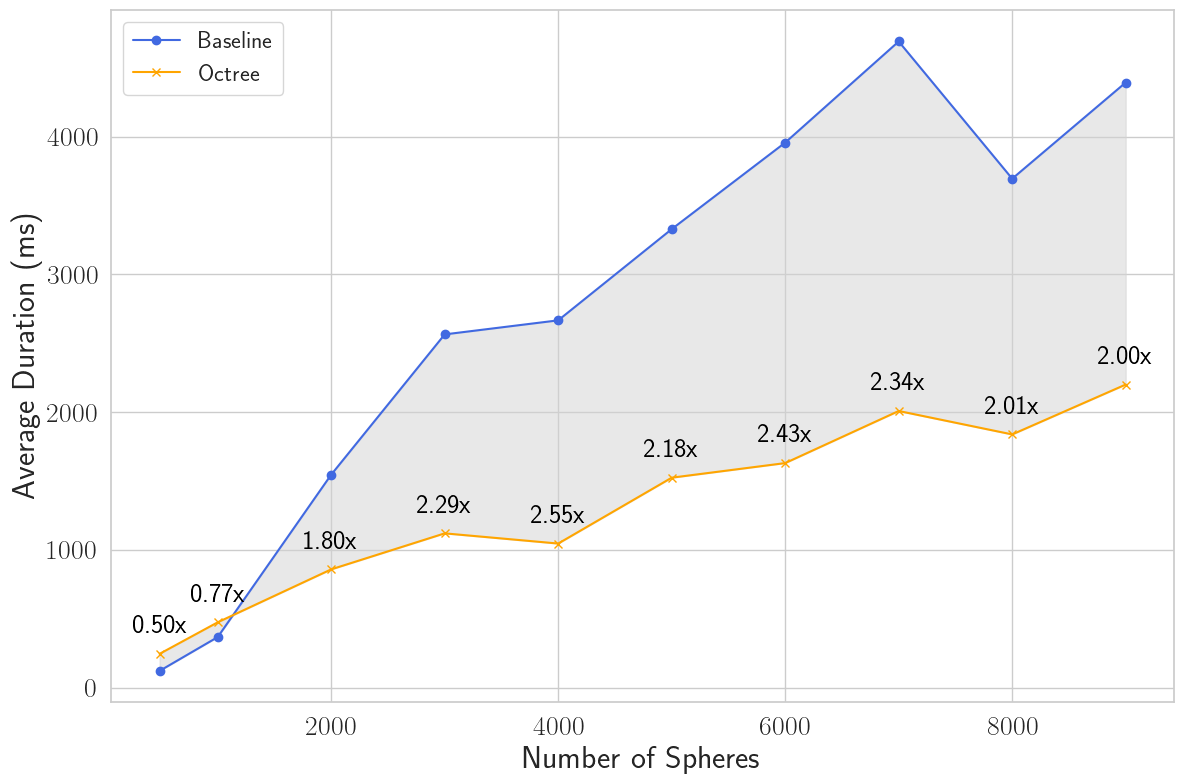

   NUM_SPHERES   Speedup
0          488  0.495953
1         1000  0.773873
2         2000  1.800509
3         3000  2.289286
4         4000  2.548757
5         5000  2.183727
6         6000  2.426994
7         7000  2.335657
8         8000  2.009793
9         9000  1.996364


In [19]:
# plots octree implementation against baseline for sphere radius=0.1 for different number of spheres in terms of duration
filtered_df = result_df[(result_df['SPHERE_RADIUS'] == 0.2) &
                        (~result_df['experiment_name'].isin(['RayTracingBaseline', 'RayTracingFP16'])) &
                        (result_df['kernel_name'] == 'render') &
                        (result_df['metric_name'] == 'Duration')]

baseline_df = filtered_df[filtered_df['BASELINE'] == True]
octree_df = filtered_df[filtered_df['BASELINE'] == False]

baseline_plot = baseline_df.groupby('NUM_SPHERES')['avg'].mean()
octree_plot = octree_df.groupby('NUM_SPHERES')['avg'].mean()

speedup = (baseline_plot / octree_plot).reset_index()
speedup.columns = ['NUM_SPHERES', 'Speedup']

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

plt.plot(baseline_plot.index, baseline_plot.values, marker='o', label='Baseline', color='royalblue')
plt.plot(octree_plot.index, octree_plot.values, marker='x', label='Octree', color='orange')
plt.fill_between(baseline_plot.index, octree_plot.values, baseline_plot.values, color='lightgray', alpha=0.5)

for i, row in speedup.iterrows():
    plt.text(row['NUM_SPHERES'], octree_plot[row['NUM_SPHERES']] + 150,  
             f"{row['Speedup']:.2f}x", ha='center', fontsize=19, color='black') 

#plt.title('Duration vs Number of Spheres (Sphere Radius 0.1)')
plt.xlabel('Number of Spheres', fontsize=23)
plt.ylabel('Average Duration (ms)', fontsize=23)
plt.tick_params(axis='both', which='major', labelsize=20)      
plt.legend(fontsize=17)
plt.tight_layout()
plt.savefig("octree_comparison_02.pdf")
plt.show()

print(speedup)

## Significance Test for Duration

In [11]:
def compare_runtimes(baseline_durations, octree_durations):
    """
    Perform Welch's t-test to compare the runtimes of baseline and octree algorithms.

    Parameters:
    baseline_durations (list): Runtimes for the baseline algorithm.
    octree_durations (list): Runtimes for the octree-based algorithm.

    Returns:
    dict: A dictionary containing the t-statistic and p-value.
    """
    t_stat, p_value = stats.ttest_ind(baseline_durations, octree_durations, equal_var=False)  

    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("Significant difference in runtimes between baseline and octree.")
    else:
        print("No significant difference in runtimes between baseline and octree.")

    return {'t_statistic': t_stat, 'p_value': p_value}

duration_data = {}

for experiment, df in experiment_dataframes.items():
    filtered_df = df[(df['Metric Name'] == 'Duration') & df['Kernel Name'].str.startswith('render(')]
    
    filtered_df['Metric Value'] = pd.to_numeric(filtered_df['Metric Value'], errors='coerce').dropna()
    filtered_df.loc[filtered_df['Metric Unit'] == 's', 'Metric Value'] *= 1000
    filtered_df.loc[filtered_df['Metric Unit'] == 'us', 'Metric Value'] /= 1000
    
    durations = filtered_df['Metric Value'].dropna()
    duration_data[experiment] = durations

# perform t-test for each pair of experiments
experiment_pairs = [
    ('RayTracing_BASELINE_1000_02', 'RayTracing_OCTREE_1000_02'),
    ('RayTracing_BASELINE_2000_01', 'RayTracing_OCTREE_2000_01'),
    ('RayTracing_BASELINE_2000_02', 'RayTracing_OCTREE_2000_02'),
    ('RayTracing_BASELINE_3000_01', 'RayTracing_OCTREE_3000_01'),
    ('RayTracing_BASELINE_3000_02', 'RayTracing_OCTREE_3000_02'),
    ('RayTracing_BASELINE_4000_01', 'RayTracing_OCTREE_4000_01'),
    ('RayTracing_BASELINE_4000_02', 'RayTracing_OCTREE_4000_02'),
    ('RayTracing_BASELINE_488_01', 'RayTracing_OCTREE_488_01'),
    ('RayTracing_BASELINE_488_02', 'RayTracing_OCTREE_488_02'),
    ('RayTracing_BASELINE_5000_01', 'RayTracing_OCTREE_5000_01'),
    ('RayTracing_BASELINE_5000_02', 'RayTracing_OCTREE_5000_02'),
    ('RayTracing_BASELINE_6000_01', 'RayTracing_OCTREE_6000_01'),
    ('RayTracing_BASELINE_6000_02', 'RayTracing_OCTREE_6000_02'),
    ('RayTracing_BASELINE_7000_01', 'RayTracing_OCTREE_7000_01'),
    ('RayTracing_BASELINE_7000_02', 'RayTracing_OCTREE_7000_02'),
    ('RayTracing_BASELINE_8000_01', 'RayTracing_OCTREE_8000_01'),
    ('RayTracing_BASELINE_8000_02', 'RayTracing_OCTREE_8000_02'),
    ('RayTracing_BASELINE_9000_01', 'RayTracing_OCTREE_9000_01'),
    ('RayTracing_BASELINE_9000_02', 'RayTracing_OCTREE_9000_02')
]


for baseline_exp, octree_exp in experiment_pairs:
    print(f"Test: {baseline_exp}, {octree_exp}")
    baseline_durations = duration_data.get(baseline_exp, [])
    octree_durations = duration_data.get(octree_exp, [])
    
    if len(baseline_durations) == 5 and len(octree_durations) == 5:
        compare_runtimes(baseline_durations, octree_durations)
    else:
        print(f"Insufficient data for {baseline_exp} or {octree_exp}")

Test: RayTracing_BASELINE_1000_02, RayTracing_OCTREE_1000_02
T-statistic: -40.991470213013535
P-value: 7.015721118998489e-10
Significant difference in runtimes between baseline and octree.
Test: RayTracing_BASELINE_2000_01, RayTracing_OCTREE_2000_01
T-statistic: 121.80217918961144
P-value: 3.5998563758578064e-12
Significant difference in runtimes between baseline and octree.
Test: RayTracing_BASELINE_2000_02, RayTracing_OCTREE_2000_02
T-statistic: 110.54042820490852
P-value: 2.664256317705576e-10
Significant difference in runtimes between baseline and octree.
Test: RayTracing_BASELINE_3000_01, RayTracing_OCTREE_3000_01
T-statistic: 281.56281151079844
P-value: 1.094973422308891e-12
Significant difference in runtimes between baseline and octree.
Test: RayTracing_BASELINE_3000_02, RayTracing_OCTREE_3000_02
T-statistic: 147.37763285745456
P-value: 3.723578423734368e-10
Significant difference in runtimes between baseline and octree.
Test: RayTracing_BASELINE_4000_01, RayTracing_OCTREE_4000_

/var/folders/wk/z81yzxzn7374nllywcxyt25w0000gn/T/ipykernel_17599/3442149548.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Metric Value'] = pd.to_numeric(filtered_df['Metric Value'], errors='coerce').dropna()
/var/folders/wk/z81yzxzn7374nllywcxyt25w0000gn/T/ipykernel_17599/3442149548.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Metric Value'] = pd.to_numeric(filtered_df['Metric Value'], errors='coerce').dropna()
/var/folders/wk/z81yzxzn7374nllywcxyt25w0000gn/T/ipykern